In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches

In [2]:
pwd

'/workspace/algo/DACON'

In [3]:
ll

합계 3804
-rw-rw-r-- 1 root 3753537 11월 30 14:47 classification_wine.ipynb
drwxrwx--- 2 root    4096 11월 30 14:22 dataset/
-rw-rw-r-- 1 root  133760 11월 30 14:21 dataset.zip


### train.csv : 학습 데이터
- id : 식별 고유값  
- fixed acidity : 고정(비휘발성) 산도 : 와인과 관련된 대부분의 산  
- volatile acidity : 휘발성 산도 : 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음  
- citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음  
- residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함  
- chlorides : 염소화물: 와인의 염분량  
- free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함  
- total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남  
- density : 밀도: 알코올 및 당 함량에 따라 변함  
- pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임  
- sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용  
- alcohol : 와인의 알코올 함량 백분율
- type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨
- quality : 맛으로 평가된 와인의 품질

In [4]:
df = pd.read_csv('dataset/train.csv')
df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [6]:
df.describe()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,1616.000000,7.205772,0.336072,0.319496,5.454813,0.055890,30.583720,116.256577,0.994667,3.214166,0.531455,10.497108,5.829155
std,932.853686,1.295494,0.160285,0.145854,4.816098,0.035722,17.387143,55.759070,0.003054,0.161873,0.149686,1.193813,0.850003
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.400000,4.000000
25%,808.500000,6.400000,0.227500,0.250000,1.800000,0.038000,17.000000,78.000000,0.992205,3.100000,0.430000,9.500000,5.000000
50%,1616.000000,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,119.000000,0.994840,3.200000,0.510000,10.300000,6.000000
75%,2423.500000,7.700000,0.400000,0.390000,8.100000,0.064000,42.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,3231.000000,15.900000,1.040000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.980000,14.900000,8.000000


In [7]:
import plotly.express as px

In [27]:
df['quality']= df['quality'].astype(str)

In [28]:
counted_values = df['quality'].value_counts()
counted_values

6    1418
5    1069
7     539
4     108
8      97
Name: quality, dtype: int64

In [29]:
df1 = df.groupby(['quality']).count().reset_index()
fig = px.bar(df1, title = 'class counting',
             x = "quality",
             y = df.groupby(['quality']).size(),
             color = "quality"
            )
fig.show()

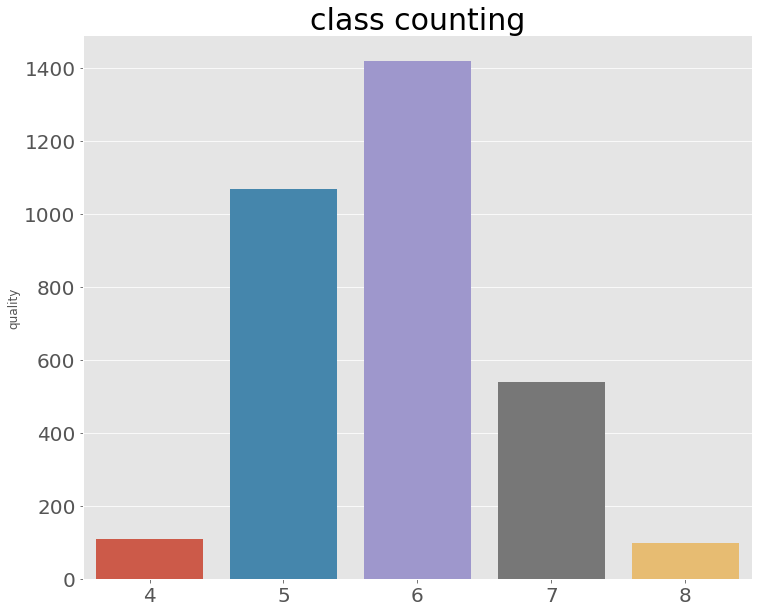

In [11]:
counted_values = df['quality'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

In [21]:
for i in range(4, 9):
    quality_description = df[df['quality'] == i].drop(['id', 'quality'], axis=1).describe()
    if i == 4:
        means = pd.DataFrame({i: quality_description.loc['mean']})
    else:
        mean = pd.DataFrame({i: quality_description.loc['mean']})
        means = pd.concat([means, mean], axis=1)

# column, row switch        
means = means.T

In [22]:
means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4,7.275926,0.469028,0.260926,3.962037,0.056972,20.796296,104.356481,0.994770,3.232870,0.505833,10.180556
5,7.339757,0.383634,0.313143,5.889476,0.064714,30.526193,121.696445,0.995868,3.204995,0.529897,9.846333
6,7.161142,0.309870,0.323886,5.548942,0.054214,30.960860,115.722849,0.994518,3.213801,0.531065,10.578573
7,7.127180,0.292653,0.331633,4.679221,0.045111,30.725417,108.591837,0.993034,3.225733,0.542801,11.445659
8,6.740206,0.288196,0.323093,5.260309,0.041825,35.814433,119.948454,0.992576,3.235464,0.519794,11.559794


In [43]:
means.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [44]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 6, cols = 3, 
                    horizontal_spacing = 0.03,
                    vertical_spacing = 0.05,
                    subplot_titles = means.columns
                   )
fig.show()

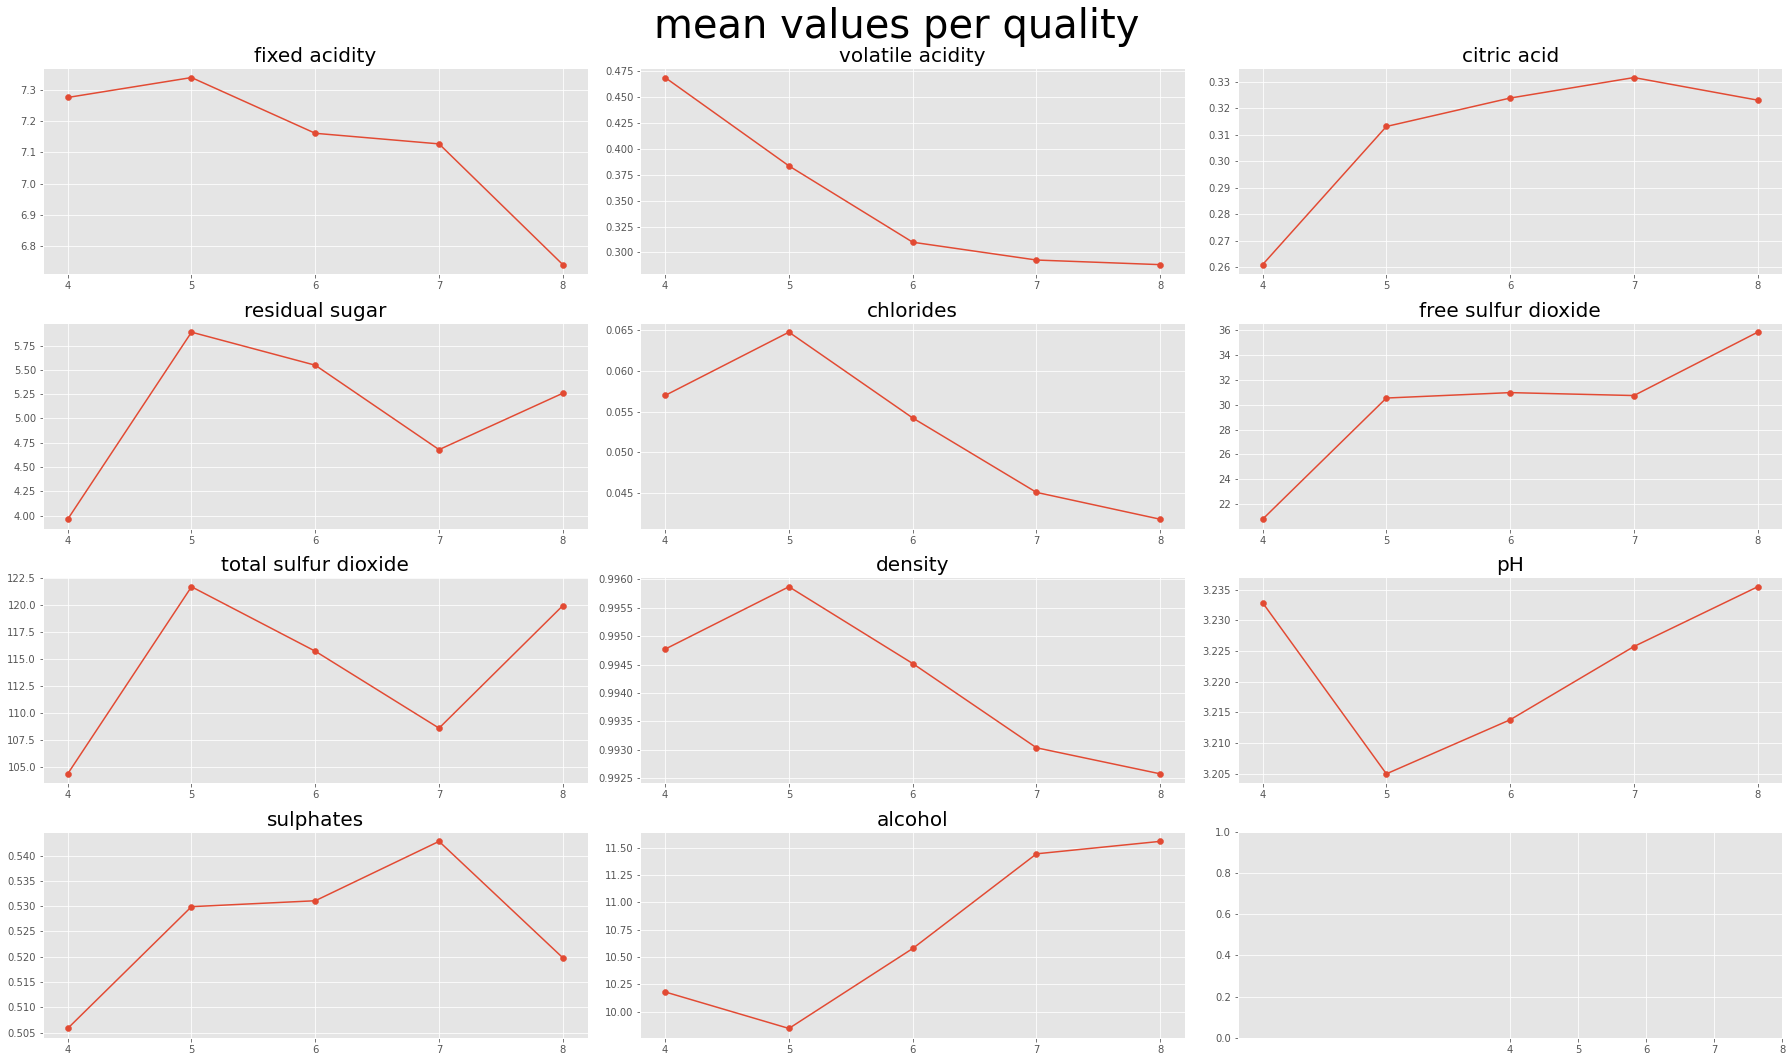

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(25, 15))

fig.suptitle('mean values per quality', fontsize= 40)
for ax, col in zip(axes.flat, means.columns):
    ax.plot([4,5,6,7,8], means[col])
    ax.scatter([4,5,6,7,8], means[col])
    ax.set_title(col, fontsize=20)
plt.setp(axes, xticks=[4, 5, 6, 7, 8])
plt.tight_layout()
plt.show()